# Decision Trees Based Methods Classification Case

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
import numpy as np
from mypipes import *
%matplotlib inline

In [2]:
file=pd.read_csv("C:\\Users\\Larry Williams\\Desktop\\Mamata\\Edvancer\\data\\data\\census_income.csv")

In [3]:
file.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Y
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
file['Y'].value_counts()

 <=50K    24720
 >50K      7841
Name: Y, dtype: int64

In [6]:
cat_vars=list(file.select_dtypes(include=['object']).columns)

In [7]:
cat_vars

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'Y']

In [8]:
cat_vars=[_ for _ in cat_vars if _ not in ['Y','education']]

In [9]:
cat_vars

['workclass',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

In [10]:
num_vars=list(file.select_dtypes(exclude=['object']).columns)

In [11]:
num_vars

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [12]:
file.shape

(32561, 15)

In [13]:
p1=pdPipeline([
    ('cat_select',VarSelector(cat_vars)),
    ('missing_trt',DataFrameImputer()),
    ('create_dummies',get_dummies_Pipe(300))
])

p2=pdPipeline([
    ('num_select',VarSelector(num_vars)),
    ('missing_trt',DataFrameImputer())
])

data_pipe=FeatureUnion([
    ('cat_pipe',p1),
    ('num_pipe',p2)
])

In [15]:
x_train=pd.DataFrame(data=data_pipe.fit_transform(file),
                     columns=data_pipe.get_feature_names())

In [16]:
file['Y'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [17]:
y_train=(file['Y']==' >50K').astype(int)

In [18]:
y_train.value_counts()

0    24720
1     7841
Name: Y, dtype: int64

In [19]:
from sklearn.model_selection import RandomizedSearchCV

In [20]:
params={ 'class_weight':[None,'balanced'], 
        'criterion':['entropy','gini'],
        'max_depth':[None,5,10,15,20,30,50,70],
            'min_samples_leaf':[1,2,5,10,15,20], 
            'min_samples_split':[2,5,10,15,20]
       }

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
clf=DecisionTreeClassifier()

In [24]:
random_search=RandomizedSearchCV(clf,
                                 cv=10,
                                 param_distributions=params,
                                 scoring='roc_auc',
                                 n_iter=10,n_jobs=-1,verbose=20
                                    )

In [25]:
random_search.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
         

In [26]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.5f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [27]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.89856 (std: 0.00581)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 20, 'max_depth': 15, 'criterion': 'gini', 'class_weight': 'balanced'}

Model with rank: 2
Mean validation score: 0.89064 (std: 0.00702)
Parameters: {'min_samples_split': 15, 'min_samples_leaf': 10, 'max_depth': 15, 'criterion': 'entropy', 'class_weight': None}

Model with rank: 3
Mean validation score: 0.89041 (std: 0.00589)
Parameters: {'min_samples_split': 15, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'entropy', 'class_weight': None}

Model with rank: 4
Mean validation score: 0.88447 (std: 0.00515)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 5, 'criterion': 'gini', 'class_weight': None}

Model with rank: 5
Mean validation score: 0.88322 (std: 0.00699)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 2, 'max_depth': 15, 'criterion': 'entropy', 'class_weight': None}



In [28]:
dtree=DecisionTreeClassifier(**{'min_samples_split': 20, 'min_samples_leaf': 10, 'max_depth': 4, 'criterion': 'entropy', 'class_weight': None})

In [29]:
dtree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
dotfile = open("mytree.dot", 'w')

tree.export_graphviz(dtree,out_file=dotfile,
                     feature_names=x_train.columns,
                    class_names=["0","1"],
                     )
dotfile.close()

In [34]:
x_train.shape

(32561, 45)

In [35]:

from sklearn.ensemble import RandomForestClassifier


In [36]:
x_train.shape

(32561, 45)

In [37]:
clf = RandomForestClassifier()

In [38]:
param_dist = {"n_estimators":[100,200,300,500,700,1000],
              "max_features": [5,10,20,25,30,35],
              "bootstrap": [True, False],
              'class_weight':[None,'balanced'], 
                'criterion':['entropy','gini'],
                'max_depth':[None,5,10,15,20,30,50,70],
                'min_samples_leaf':[1,2,5,10,15,20], 
                'min_samples_split':[2,5,10,15,20]
                  }

In [39]:
x_train.shape

(32561, 45)

In [40]:
# run randomized search
n_iter_search = 10
# n_iter parameter of RandomizedSeacrhCV controls, how many 
# parameter combination will be tried; out of all possible given values

random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search,
                                   scoring='roc_auc',
                                   cv=10,
                                  n_jobs=-1,verbose=20)
random_search.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  6

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [41]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=20, max_features=30,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.91864 (std: 0.00390)
Parameters: {'n_estimators': 500, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': 30, 'max_depth': 20, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}

Model with rank: 2
Mean validation score: 0.91826 (std: 0.00401)
Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 25, 'max_depth': 15, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}

Model with rank: 3
Mean validation score: 0.91770 (std: 0.00460)
Parameters: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 20, 'max_depth': 70, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': True}

Model with rank: 4
Mean validation score: 0.91766 (std: 0.00410)
Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 20, 'max_depth': 10, 'criterion': 'gini', 'class_weight': None, 'bootstrap'

In [43]:
# select the best values from results above, they will vary slightly with each run
rf=RandomForestClassifier(**{'n_estimators': 500, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 25, 'max_depth': 15, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': True})

In [44]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features=25,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Feature Importance

In [45]:
feat_imp_df=pd.DataFrame({'features':x_train.columns,
                          'importance':rf.feature_importances_})

feat_imp_df=feat_imp_df.sort_values('importance',ascending=False)
feat_imp_df['normalised_imp']=feat_imp_df['importance']/np.sum(feat_imp_df['importance'])
feat_imp_df['cum_imp']=np.cumsum(feat_imp_df['normalised_imp'])

In [46]:
feat_imp_df

,features,importance,normalised_imp,cum_imp
7,cat_pipe__marital.status_ Married-civ-spouse,0.282486,0.282486,0.282486
41,num_pipe__education.num,0.146379,0.146379,0.428865
42,num_pipe__capital.gain,0.121051,0.121051,0.549916
39,num_pipe__age,0.086145,0.086145,0.636061
26,cat_pipe__relationship_ Husband,0.081790,0.081790,0.717851
44,num_pipe__hours.per.week,0.054198,0.054198,0.772049
40,num_pipe__fnlwgt,0.043663,0.043663,0.815712
8,cat_pipe__marital.status_ Never-married,0.034743,0.034743,0.850455
43,num_pipe__capital.loss,0.031051,0.031051,0.881506
30,cat_pipe__relationship_ Wife,0.021649,0.021649,0.903155


## Partial Dependence Plot



In [47]:
x_train.columns

Index(['cat_pipe__workclass_ Private', 'cat_pipe__workclass_ Self-emp-not-inc',
       'cat_pipe__workclass_ Local-gov', 'cat_pipe__workclass_ ?',
       'cat_pipe__workclass_ State-gov', 'cat_pipe__workclass_ Self-emp-inc',
       'cat_pipe__workclass_ Federal-gov',
       'cat_pipe__marital.status_ Married-civ-spouse',
       'cat_pipe__marital.status_ Never-married',
       'cat_pipe__marital.status_ Divorced',
       'cat_pipe__marital.status_ Separated',
       'cat_pipe__marital.status_ Widowed',
       'cat_pipe__marital.status_ Married-spouse-absent',
       'cat_pipe__occupation_ Prof-specialty',
       'cat_pipe__occupation_ Craft-repair',
       'cat_pipe__occupation_ Exec-managerial',
       'cat_pipe__occupation_ Adm-clerical', 'cat_pipe__occupation_ Sales',
       'cat_pipe__occupation_ Other-service',
       'cat_pipe__occupation_ Machine-op-inspct', 'cat_pipe__occupation_ ?',
       'cat_pipe__occupation_ Transport-moving',
       'cat_pipe__occupation_ Handlers-cleaner

In [48]:
var_name='num_pipe__education.num'

preds=rf.predict_proba(x_train)[:,1]
# part_dep_data

In [49]:
var_data=pd.DataFrame({'var':x_train[var_name],'response':preds})

In [50]:
# var_data

In [51]:
%matplotlib inline

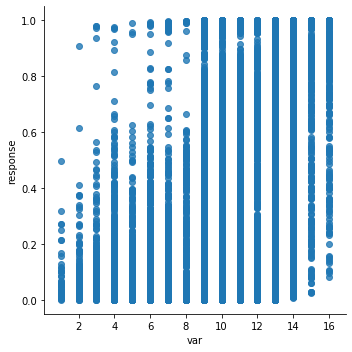

In [52]:
import seaborn as sns

sns.lmplot(x='var',y='response',data=var_data,fit_reg=False)

In [53]:
import statsmodels.api as sm
smooth_data=sm.nonparametric.lowess(var_data['response'],var_data['var'])

# smooth_data

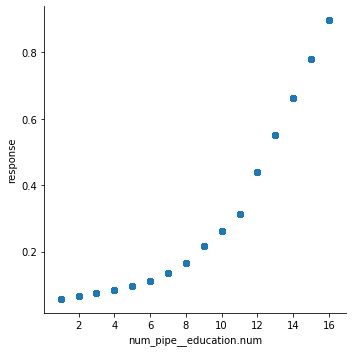

In [54]:
df=pd.DataFrame({'response':smooth_data[:,1],var_name:smooth_data[:,0]})

sns.lmplot(x=var_name,y='response',data=df,fit_reg=False)

## ExtraTrees



In [55]:
from sklearn.ensemble import ExtraTreesClassifier

In [56]:
param_dist = {"n_estimators":[100,200,300,500,700,1000],
              "max_features": [5,10,20,25,30,35],
              "bootstrap": [True, False],
              'class_weight':[None,'balanced'], 
                'criterion':['entropy','gini'],
                'max_depth':[None,5,10,15,20,30,50,70],
                'min_samples_leaf':[1,2,5,10,15,20], 
                'min_samples_split':[2,5,10,15,20]
                  }

In [57]:
clf=ExtraTreesClassifier()

In [58]:
n_iter_search = 10

random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search,
                                   scoring='roc_auc',
                                   cv=10,
                                  n_jobs=-1,verbose=20)
random_search.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  1

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                       

In [59]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.91295 (std: 0.00491)
Parameters: {'n_estimators': 500, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 30, 'max_depth': 20, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}

Model with rank: 2
Mean validation score: 0.91218 (std: 0.00504)
Parameters: {'n_estimators': 500, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 35, 'max_depth': 70, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': True}

Model with rank: 3
Mean validation score: 0.91116 (std: 0.00482)
Parameters: {'n_estimators': 700, 'min_samples_split': 20, 'min_samples_leaf': 15, 'max_features': 30, 'max_depth': None, 'criterion': 'gini', 'class_weight': None, 'bootstrap': True}

Model with rank: 4
Mean validation score: 0.91040 (std: 0.00486)
Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 15, 'max_features': 30, 'max_depth': 20, 'criterion': 'entropy', 'class_weight': None, 'bootstrap'